In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ai_client
from src.utils import *
from src.const import *
from src.plots import *
from src.signal_providers.signal_manager import *
from src.news_providers.news_api_provider import *
from src.agents.news_filtering_agent import *
from src.agents.trading_agent import *
from src.agents.supervisor_trader import SupervisorTrader
from src.agents.marginal_agent import MarginalAgent
from src.agents.supervisor_margin_trader import SupervisorMarginTrader
from src.news_providers.tradingview_provider import TradingViewProvider
from src.agents.automated_supervised_trader import AutomatedSupervisedTrader

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
coin = "ETH"

cutoff = get_current_datetime()
str(cutoff)

'2024-05-13 02:49:11.190342'

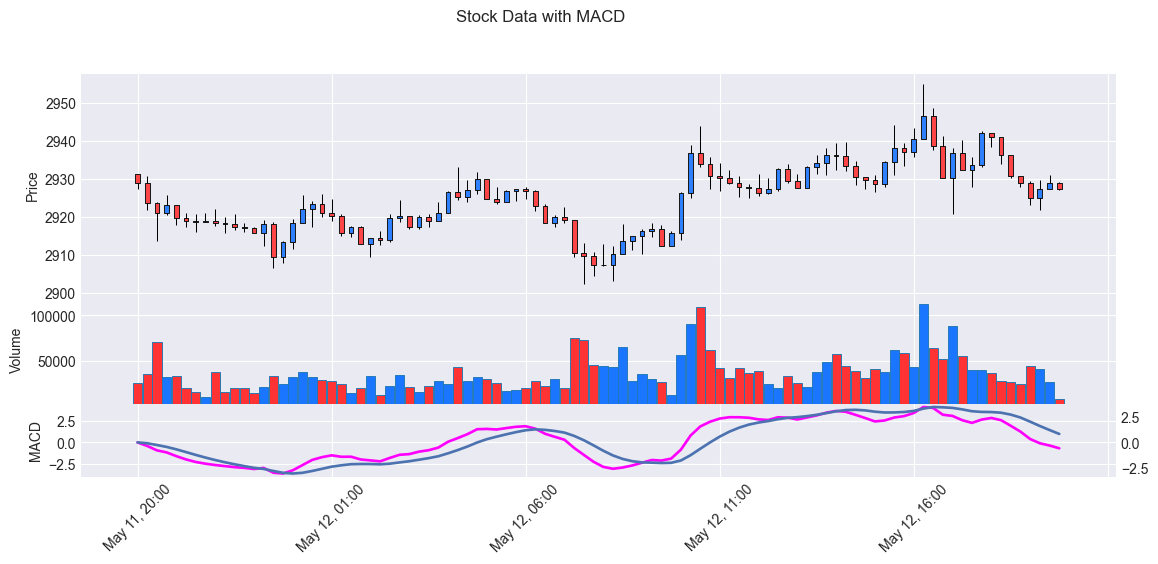

In [15]:
day_12h_history, day_history, week_history = map_async(lambda: get_12h_history(coin), lambda: get_day_history(coin), lambda: get_week_history(coin))
make_candlebars(day_history)

In [25]:
napi = TradingViewProvider()
trading_agent = SupervisorMarginTrader()
filtering_agent = NewsFilteringAgent()

news = napi.get_news(coin)
filtered_news = filtering_agent.filter_news(coin, news[:30])
json.loads(filtered_news)

{'description': "Ethereum (ETH) has experienced a challenging week with a marked price drop of 6.45% amidst broader market downturns. An emerging pattern of weakness against Bitcoin has been noted, with ETH losing over a third of its value in a two-year period despite migrating to proof-of-stake. This downtrend is fueled by Ethereum's weak fundamentals and highlighted by a significant whale offloading all holdings. Furthermore, ARK Invest and 21Shares indicated a declining optimism for an imminent approval of an ETH-focused ETF by removing related staking plans. Meanwhile, the broader Ethereum ecosystem grapples with concerns about its scalability and utility, especially in comparison to emerging competitors like Solana.",
 'sentiment': 'negative',
 'sentiment_description': 'The overall sentiment surrounding Ethereum is negative due to continual price declines, confirmed by technical analysis suggesting bearish trends. Negative sentiment is also influenced by weakening market fundament

[{'role': 'system', 'content': "You are professional momentum trader with an extensive understanding of cryptocurrency markets. \n                \n                Respond with JSON of described format.\n                Guidelines:\n                - Do not buy on everything you have, distribute spendings!\n                - Consider historical market data and recent news\n                - Use only money from your 'balance'\n                \n                Your goal is to make make as much profit as possible\n                "}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last day.'}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'high'}}]}, {'role': 'user', 'content': 'This is news relevant news and sentiment about ETH. {\n    "description": "Ethereum (ETH) has experienced a challenging week with a marked price drop of 6.45% amidst broader market downturns. An emerging pattern of weakness against Bitcoin has been noted
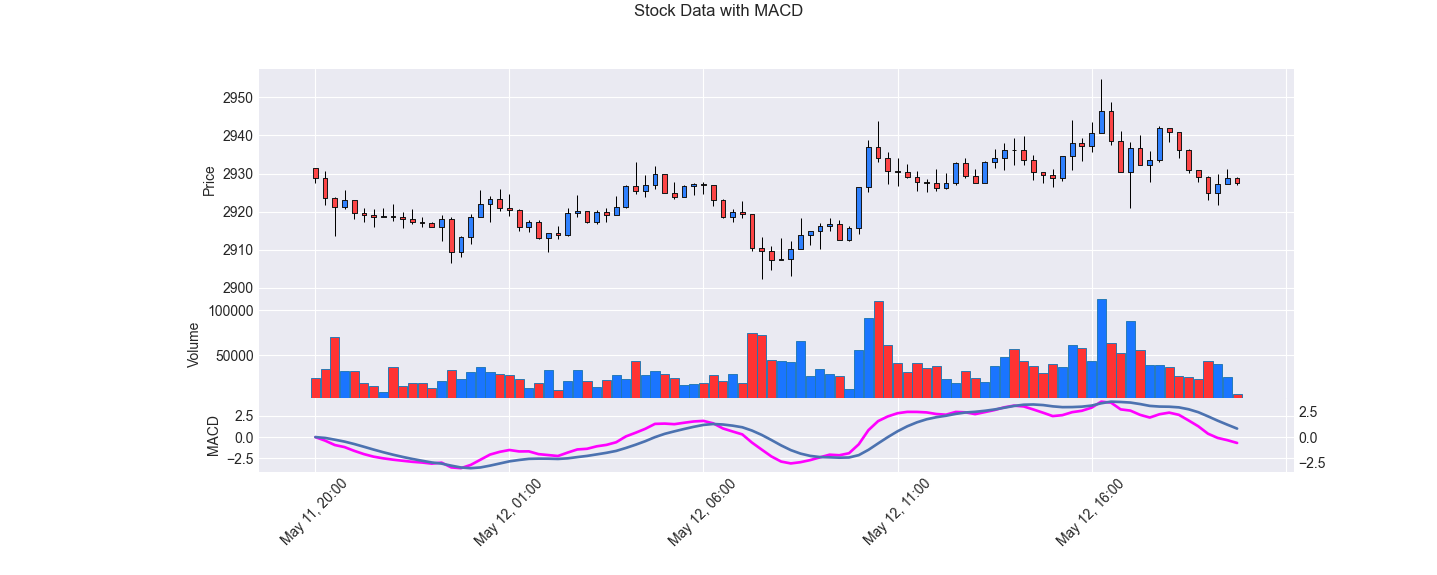

'{\n    "strategy_evaluation": "The decision to go short makes sense based on the observed technical data and the prevailing negative sentiment in the market. This aligns with a momentum trading strategy, which aims to capitalize on existing market trends. The strategy seems reasonably calculated to exploit the negative trend.",\n    "calculations_evaluation": "The price differences and the percentages appear to be calculated correctly. Shorting at current price (2927.39) with a take-profit at 2890 gives a downward potential of 37.39 points. Stop-loss at 2950 provides an upward risk of 22.61 points. The percentage gain if take-profit is hit (1.28%) and loss if stop-loss is attained (2.11%) are correct, reflecting the 1x leverage used with $1000.",\n    "changes_description": "No changes to the strategy are required. However, ongoing monitoring of the market sentiment and technical indicators is necessary to adjust the strategy quickly if conditions change.",\n    "technical_analysis": 

In [26]:
balance = {coin: 0, "USDT": 1000}
operations_history = []

predict, _ = trading_agent.decide(
    coin=coin,
    news=filtered_news,
    #day_12h_data=day_12h_history,
    day_data=day_history,
    #week_data=week_history,
    #year_data=year_history,
    #operations_history=operations_history,
    current_balance=balance,
    leverage="1x",
    verbose=True,
)

predict

[{'role': 'system', 'content': "You are professional momentum trader with an extensive understanding of cryptocurrency markets. \n                \n                Respond with JSON of described format.\n                Guidelines:\n                - Do not buy on everything you have, distribute spendings!\n                - Consider historical market data and recent news\n                - Use only money from your 'balance'\n                \n                Your goal is to make make as much profit as possible\n                "}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last day.'}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'high'}}]}, {'role': 'user', 'content': "Your current balance, you can only use money that you have:. {'ETH': 0, 'USDT': 1000}"}, {'role': 'user', 'content': 'Decise best actions in the market following momentum trading strategy. Current price: 3246.57.\n\n                Decide what to do in f
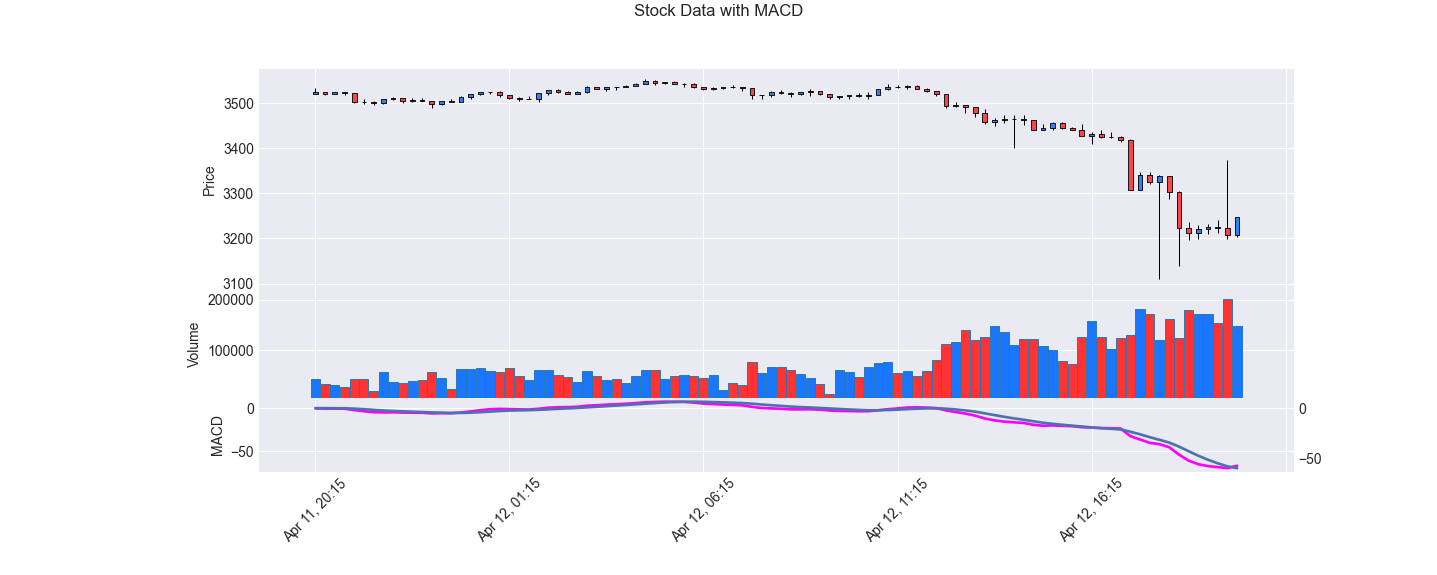

{'strategy_evaluation': 'The decision to engage in a short sell aligns well with the observed market momentum and technical indicators, particularly the bearish MACD and downward trend in prices. The overall strategy seems sensible given the projected continuation of the downward trend.',
 'calculations_evaluation': 'The potential profit and loss calculations for the short sell strategy require validation. With a current price of 3246.57, a take-profit at 3000, and a stop-loss at 3300, the potential profit and loss calculations are as follows: if the price moves from 3246.57 to 3000, this represents a decrease of 246.57, which on a price of 3246.57 is approximately 7.6%. The potential loss, if the price reaches the stop-loss of 3300 from 3246.57, is 53.43 or approximately 1.6%.',
 'changes_description': 'The profit and loss percentages for the short position are correctly calculated in the initial analysis. No changes are needed.',
 'technical_analysis': 'The MACD line is below the sig

In [30]:
agent = AutomatedSupervisedTrader()

cutoff = subtract_time(get_current_datetime(), days=30)

predict, _, history = agent.decide(coin=coin, balance=balance, cutoff=cutoff)
predict

In [31]:
from src.testing.test_runner import TestingEngine
from src.agents.random_predictor import RandomPredictor

agent = RandomPredictor(trade_rate=0.04, tp_ratio=0.3)

engine = TestingEngine(coin="ETH", agent=agent, balance={"usdt": 1000})

engine.test(steps=50)

print(engine.balance)

{'usdt': 1012.9958021097486}


In [32]:
engine.logs

['Start step 0',
 "Predict {'final_decision': 'long', 'price': 3246.57, 'stop_loss': 3207.61116, 'take_profit': 3376.4328000000005, 'leverage': '1x', 'amount': 300.0}",
 "balance {'usdt': 700.0}",
 "MATCHED {'kind': 'long', 'take_profit': 3376.4328000000005, 'stop_loss': 3207.61116, 'amount': 300.0, 'price': 3246.57, 't': 1712952778} TP",
 "new balance {'usdt': 1012.0}",
 'Start step 1',
 "Predict {'final_decision': 'short', 'price': 3185.47, 'stop_loss': 3223.69564, 'take_profit': 3058.0512, 'leverage': '1x', 'amount': 303.59999999999997}",
 "balance {'usdt': 708.4000000000001}",
 "MATCHED {'kind': 'short', 'take_profit': 3058.0512, 'stop_loss': 3223.69564, 'amount': 303.59999999999997, 'price': 3185.47, 't': 1712974378} SL",
 "new balance {'usdt': 1008.3568}",
 'Start step 2',
 "Predict {'final_decision': 'short', 'price': 3250.67, 'stop_loss': 3289.6780400000002, 'take_profit': 3120.6432, 'leverage': '1x', 'amount': 302.50704}",
 "balance {'usdt': 705.8497600000001}",
 "MATCHED {'ki

[{'role': 'system', 'content': "You are professional momentum trader with an extensive understanding of cryptocurrency markets. \n                \n                Respond with JSON of described format.\n                Guidelines:\n                - Do not buy on everything you have, distribute spendings!\n                - Consider historical market data and recent news\n                - Use only money from your 'balance'\n                \n                Your goal is to make make as much profit as possible\n                "}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last day.'}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'high'}}]}, {'role': 'user', 'content': "Your current balance, you can only use money that you have:. {'usdt': 1000}"}, {'role': 'user', 'content': 'Decise best actions in the market following momentum trading strategy. Current price: 3247.46.\n\n                Decide what to do in futures tra
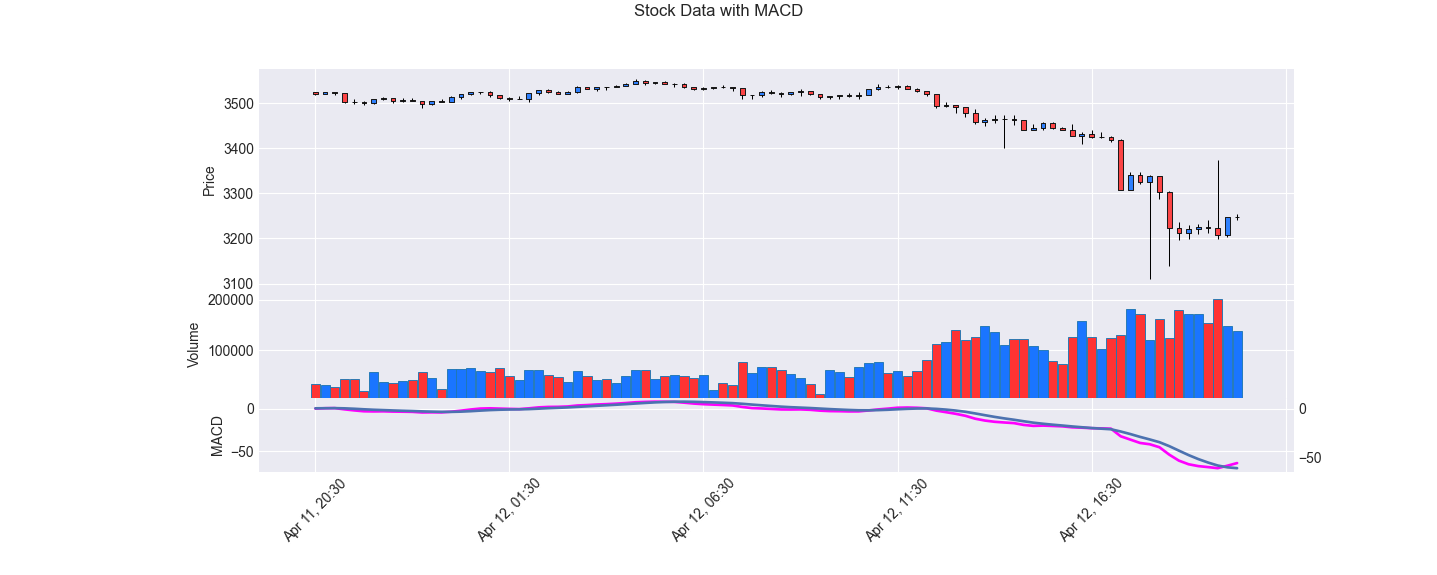

In [36]:
from src.testing.test_runner import TestingEngine
from src.agents.random_predictor import RandomPredictor

agent = AutomatedSupervisedTrader()

engine = TestingEngine(coin="ETH", agent=agent, balance={"usdt": 1000})

engine.test(steps=15)

print(engine.balance)

In [ ]:
engine.logs

['Start step 0',
 'Predict {\'strategy_evaluation\': "The decision to go \'short\' makes sense given the consistent downward trend and negative MACD. This aligns well with momentum trading which seeks to capitalize on existing market directions. The chosen \'short\' position is expected to be profitable given the ongoing bearish indicators.", \'calculations_evaluation\': \'The calculations are correct. Assuming short sale at 3247.46 with a take-profit at 3150, and a stop-loss at 3300, the potential maximum profit can be calculated as follows: ((3247.46 - 3150) / 3247.46) * 100 = approximately 3%. The risk is measured by the stop-loss, generating a potential loss of ((3300 - 3247.46) / 3247.46) * 100 = approximately 1.62%.\', \'changes_description\': \'No changes are necessary as the initial setup already optimizes the trade within given market conditions and the set risk tolerance.\', \'technical_analysis\': \'The MACD line is below the signal line and trending downwards, indicating be

In [35]:
engine.orders

[]